In [1]:
import sys
sys.path.append('../models_new')

import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from sklearn.preprocessing import StandardScaler

import model_utils as util
from construct_model_matrices import ModelMatrixConstructor

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [2]:
DATA_DIR = '../../data/Xy_internal_split_data'

In [3]:
matrix_constructor = ModelMatrixConstructor(DATA_DIR)
data_sets = matrix_constructor.construct_model_matrices()

Train:
  ['X_train_1998.csv'] 
  ['y_train_1998.csv']
Valid:
  ['X_valid_1998.csv'] 
  ['y_valid_1998.csv']
Test:
  ['X_test_1998.csv'] 
  ['y_test_1998.csv']
Loading data from ['X_train_1998.csv']...
Loading data from ['X_valid_1998.csv']...
Loading data from ['X_test_1998.csv']...
Loading data from ['y_train_1998.csv']...
Loading data from ['y_valid_1998.csv']...
Loading data from ['y_test_1998.csv']...
Adding quadratic terms...
Adding cubic terms...
Adding interactions...
Adding quadratic terms...
Adding cubic terms...
Adding interactions...
Adding quadratic terms...
Adding cubic terms...
Adding interactions...


In [4]:
def print_dims(data_set, name):
    print('%s:\n X: %r\n y: %r' 
          % (name, data_set[0].shape, data_set[1].shape))

In [5]:
[[X_train, y_train], [X_valid, y_valid], [X_test, y_test]] = data_sets
for (data_set, name) in zip(data_sets, ['Train', 'Valid', 'Test']):
    print_dims(data_set, name)

Train:
 X: (194820, 124)
 y: (194820, 1)
Valid:
 X: (41785, 124)
 y: (41785, 1)
Test:
 X: (41305, 124)
 y: (41305, 1)


In [6]:
predictors = list(X_train)

In [7]:
print('NAs:')
for field in list(X_train):
    n_na = sum(np.isnan(X_train[field]))
    if n_na:
        print('%s:\t%d' % (field, n_na))

NAs:
density:	10522
density_sq:	10522
density_cub:	10522
density:summerP0:	10522
density:summerP1:	10522
density:summerP2:	10522


In [16]:
max(X_test.x), max(X_test.y)

(1073, 899)

In [14]:
density_matrix_train = util.column2matrix(X_train, 'density', cell_dim=1)
density_matrix_valid = util.column2matrix(X_valid, 'density', cell_dim=1)
density_matrix_test  = util.column2matrix(X_test,  'density', cell_dim=1)

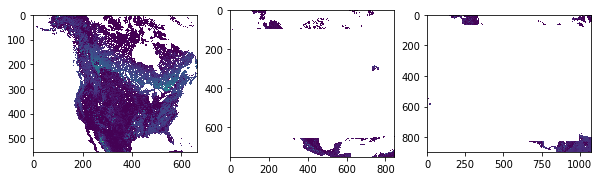

In [15]:
plt.subplot(1, 3, 1);
imshow(np.rot90(density_matrix_train));

plt.subplot(1, 3, 2);
imshow(np.rot90(density_matrix_valid));
plt.subplot(1, 3, 3);
imshow(np.rot90(density_matrix_test));

In [14]:
def scale_data(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test  = scaler.transform(X_test)
    return X_train, X_valid, X_test

In [17]:
X_train, X_valid, X_test = scale_data(X_train, X_valid, X_test) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').